In [1]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from stable_baselines.common.env_checker import check_env
from IPython.display import clear_output
import time
from copy import deepcopy
from ray import tune
from stable_baselines.common.callbacks import BaseCallback

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



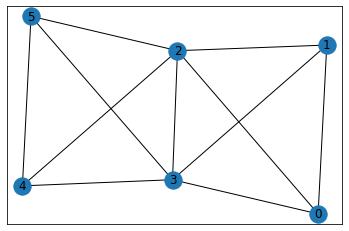

In [2]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

d = defaultdict(list)
"""Larger network"""
#data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10),(4,10)]#(4,6),(5,10),(6,10),(9,6),(8,10)]
"""Smaller netowrk"""
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw_networkx(G)

In [3]:
env = gym.make('wmac-graph-v0',graph=G)

In [4]:
check_env(env)

In [5]:
import tensorflow as tf

class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """
    def __init__(self, verbose=0):
        self.is_tb_set = False
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        # Log additional tensor
        if not self.is_tb_set:
            with self.model.graph.as_default():
                tf.summary.scalar('packet_lost', tf.reduce_mean(env.get_packet_lost()))
                self.model.summary = tf.compat.v1.summary.merge_all()
            self.is_tb_set = True
        # Log scalar value (here a random variable)
        value = env.get_packet_lost()
        summary = tf.Summary(value=[tf.Summary.Value(tag='packet_lost', simple_value=value)])
        self.locals['writer'].add_summary(summary, self.num_timesteps)
        return True

In [6]:
#model = A2C(MlpPolicy, env, verbose=1,tensorboard_log="./a2c_tensorboard/")
#model.learn(total_timesteps=600000, callback=TensorboardCallback())
#model.save("a2c_wmac")

In [6]:

### Train with hyperparameter tuning. 

model = A2C(MlpPolicy, 
            env, 
            verbose=1,
            gamma = 0.9902283585257828,
            max_grad_norm = 3.1478082166984676,
            learning_rate=0.0006449103234149516,
            tensorboard_log="./a2c_tensorboard_tuned_small/")

model.learn(total_timesteps=400000,
            callback=TensorboardCallback())
model.save("a2c_wmac_small_tuned")


Wrapping the env in a DummyVecEnv.




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



---------------------------------
| explained_variance | -0.00022 |
| fps                | 7        |
| nupdates           | 1        |
| policy_entropy     | 9.13     |
| total_timesteps    | 5        |
| value_loss         | 8.99e+05 |
---------------------------------
----------------------------------
| explained_variance | -0.000562 |
| fps                | 264       |
| nupdates           | 100       |
| policy_entropy     | 9.13      |
| total_timesteps    | 500       |
| value_loss         | 4.23e+04  |
----------------------------------
---------------------------------
| explained_variance 

----------------------------------
| explained_variance | -0.000135 |
| fps                | 392       |
| nupdates           | 1400      |
| policy_entropy     | 9.06      |
| total_timesteps    | 7000      |
| value_loss         | 1.08e+05  |
----------------------------------
---------------------------------
| explained_variance | 1.12e-05 |
| fps                | 394      |
| nupdates           | 1500     |
| policy_entropy     | 8.96     |
| total_timesteps    | 7500     |
| value_loss         | 1.05e+04 |
---------------------------------
----------------------------------
| explained_variance | -3.45e-05 |
| fps                | 396       |
| nupdates           | 1600      |
| policy_entropy     | 8.93      |
| total_timesteps    | 8000      |
| value_loss         | 6.79e+04  |
----------------------------------
----------------------------------
| explained_variance | -1.98e-05 |
| fps                | 397       |
| nupdates           | 1700      |
| policy_entropy     | 9.05 

---------------------------------
| explained_variance | 0        |
| fps                | 440      |
| nupdates           | 4400     |
| policy_entropy     | 3.41     |
| total_timesteps    | 22000    |
| value_loss         | 21.3     |
---------------------------------
---------------------------------
| explained_variance | 1.62e-05 |
| fps                | 441      |
| nupdates           | 4500     |
| policy_entropy     | 2.78     |
| total_timesteps    | 22500    |
| value_loss         | 2.04e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000126 |
| fps                | 442       |
| nupdates           | 4600      |
| policy_entropy     | 3.54      |
| total_timesteps    | 23000     |
| value_loss         | 8.55e+03  |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 443      |
| nupdates           | 4700     |
| policy_entropy     | 3.27     |
| tota

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 461      |
| nupdates           | 7400     |
| policy_entropy     | 3.19     |
| total_timesteps    | 37000    |
| value_loss         | 2.75     |
---------------------------------
----------------------------------
| explained_variance | -7.15e-07 |
| fps                | 461       |
| nupdates           | 7500      |
| policy_entropy     | 2.91      |
| total_timesteps    | 37500     |
| value_loss         | 1.71e+03  |
----------------------------------
----------------------------------
| explained_variance | -7.39e-06 |
| fps                | 462       |
| nupdates           | 7600      |
| policy_entropy     | 2.72      |
| total_timesteps    | 38000     |
| value_loss         | 3.5e+03   |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 462      |
| nupdates           | 7700     |
| policy_entropy     | 4.38     

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 473      |
| nupdates           | 10400    |
| policy_entropy     | 1.23     |
| total_timesteps    | 52000    |
| value_loss         | 0.0208   |
---------------------------------
---------------------------------
| explained_variance | 2.98e-07 |
| fps                | 474      |
| nupdates           | 10500    |
| policy_entropy     | 1.51     |
| total_timesteps    | 52500    |
| value_loss         | 0.0124   |
---------------------------------
---------------------------------
| explained_variance | 0.000376 |
| fps                | 474      |
| nupdates           | 10600    |
| policy_entropy     | 1.19     |
| total_timesteps    | 53000    |
| value_loss         | 2.02     |
---------------------------------
---------------------------------
| explained_variance | -0.00104 |
| fps                | 474      |
| nupdates           | 10700    |
| policy_entropy     | 1.13     |
| total_timest

----------------------------------
| explained_variance | -2.49e-05 |
| fps                | 480       |
| nupdates           | 13500     |
| policy_entropy     | 1.75      |
| total_timesteps    | 67500     |
| value_loss         | 5.26e+03  |
----------------------------------
---------------------------------
| explained_variance | 5.96e-08 |
| fps                | 480      |
| nupdates           | 13600    |
| policy_entropy     | 1.13     |
| total_timesteps    | 68000    |
| value_loss         | 7.63     |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 480      |
| nupdates           | 13700    |
| policy_entropy     | 1.65     |
| total_timesteps    | 68500    |
| value_loss         | 0.0198   |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 481      |
| nupdates           | 13800    |
| policy_entropy     | 1.36     |
| tota

----------------------------------
| explained_variance | -0.000214 |
| fps                | 486       |
| nupdates           | 16600     |
| policy_entropy     | 2.13      |
| total_timesteps    | 83000     |
| value_loss         | 29        |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 486      |
| nupdates           | 16700    |
| policy_entropy     | 1.66     |
| total_timesteps    | 83500    |
| value_loss         | 0.000101 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 486      |
| nupdates           | 16800    |
| policy_entropy     | 1.42     |
| total_timesteps    | 84000    |
| value_loss         | 0.000535 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 486      |
| nupdates           | 16900    |
| policy_entropy     | 1.4      |
| tota

---------------------------------
| explained_variance | 0        |
| fps                | 489      |
| nupdates           | 19600    |
| policy_entropy     | 1.75     |
| total_timesteps    | 98000    |
| value_loss         | 6.75     |
---------------------------------
---------------------------------
| explained_variance | 0.000162 |
| fps                | 489      |
| nupdates           | 19700    |
| policy_entropy     | 1.43     |
| total_timesteps    | 98500    |
| value_loss         | 156      |
---------------------------------
---------------------------------
| explained_variance | -0.00147 |
| fps                | 489      |
| nupdates           | 19800    |
| policy_entropy     | 1.59     |
| total_timesteps    | 99000    |
| value_loss         | 85.1     |
---------------------------------
---------------------------------
| explained_variance | 0.000344 |
| fps                | 489      |
| nupdates           | 19900    |
| policy_entropy     | 1.81     |
| total_timest

---------------------------------
| explained_variance | 4.35e-06 |
| fps                | 490      |
| nupdates           | 22600    |
| policy_entropy     | 3.11     |
| total_timesteps    | 113000   |
| value_loss         | 33.7     |
---------------------------------
----------------------------------
| explained_variance | -1.03e-05 |
| fps                | 490       |
| nupdates           | 22700     |
| policy_entropy     | 1.37      |
| total_timesteps    | 113500    |
| value_loss         | 4.65e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00158 |
| fps                | 490      |
| nupdates           | 22800    |
| policy_entropy     | 2.61     |
| total_timesteps    | 114000   |
| value_loss         | 95.4     |
---------------------------------
---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 490      |
| nupdates           | 22900    |
| policy_entropy     | 1.57     |
| tota

---------------------------------
| explained_variance | 0.894    |
| fps                | 490      |
| nupdates           | 25700    |
| policy_entropy     | 0.637    |
| total_timesteps    | 128500   |
| value_loss         | 4.3      |
---------------------------------
---------------------------------
| explained_variance | -7.4     |
| fps                | 490      |
| nupdates           | 25800    |
| policy_entropy     | 0.839    |
| total_timesteps    | 129000   |
| value_loss         | 76.1     |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 490      |
| nupdates           | 25900    |
| policy_entropy     | 1.43     |
| total_timesteps    | 129500   |
| value_loss         | 109      |
---------------------------------
---------------------------------
| explained_variance | 0.0958   |
| fps                | 490      |
| nupdates           | 26000    |
| policy_entropy     | 1.99     |
| total_timest

---------------------------------
| explained_variance | 0.2      |
| fps                | 490      |
| nupdates           | 28800    |
| policy_entropy     | 1.1      |
| total_timesteps    | 144000   |
| value_loss         | 53.2     |
---------------------------------
---------------------------------
| explained_variance | -1.02    |
| fps                | 490      |
| nupdates           | 28900    |
| policy_entropy     | 0.78     |
| total_timesteps    | 144500   |
| value_loss         | 84.7     |
---------------------------------
---------------------------------
| explained_variance | 0.0932   |
| fps                | 490      |
| nupdates           | 29000    |
| policy_entropy     | 0.764    |
| total_timesteps    | 145000   |
| value_loss         | 2.63e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0711  |
| fps                | 490      |
| nupdates           | 29100    |
| policy_entropy     | 0.919    |
| total_timest

---------------------------------
| explained_variance | 0.569    |
| fps                | 489      |
| nupdates           | 31900    |
| policy_entropy     | 0.479    |
| total_timesteps    | 159500   |
| value_loss         | 9.31     |
---------------------------------
---------------------------------
| explained_variance | -0.079   |
| fps                | 489      |
| nupdates           | 32000    |
| policy_entropy     | 0.568    |
| total_timesteps    | 160000   |
| value_loss         | 1.51e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.23    |
| fps                | 489      |
| nupdates           | 32100    |
| policy_entropy     | 0.469    |
| total_timesteps    | 160500   |
| value_loss         | 34.4     |
---------------------------------
---------------------------------
| explained_variance | -2.83    |
| fps                | 489      |
| nupdates           | 32200    |
| policy_entropy     | 0.379    |
| total_timest

---------------------------------
| explained_variance | -1.06    |
| fps                | 488      |
| nupdates           | 35000    |
| policy_entropy     | 0.682    |
| total_timesteps    | 175000   |
| value_loss         | 37.9     |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 488      |
| nupdates           | 35100    |
| policy_entropy     | 0.613    |
| total_timesteps    | 175500   |
| value_loss         | 1.84e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.817    |
| fps                | 488      |
| nupdates           | 35200    |
| policy_entropy     | 1.19     |
| total_timesteps    | 176000   |
| value_loss         | 94.3     |
---------------------------------
---------------------------------
| explained_variance | 0.694    |
| fps                | 488      |
| nupdates           | 35300    |
| policy_entropy     | 1.57     |
| total_timest

---------------------------------
| explained_variance | -1.01    |
| fps                | 488      |
| nupdates           | 38100    |
| policy_entropy     | 0.3      |
| total_timesteps    | 190500   |
| value_loss         | 66       |
---------------------------------
---------------------------------
| explained_variance | -6.61    |
| fps                | 488      |
| nupdates           | 38200    |
| policy_entropy     | 1.33     |
| total_timesteps    | 191000   |
| value_loss         | 45.2     |
---------------------------------
---------------------------------
| explained_variance | 0.341    |
| fps                | 488      |
| nupdates           | 38300    |
| policy_entropy     | 0.971    |
| total_timesteps    | 191500   |
| value_loss         | 26.3     |
---------------------------------
---------------------------------
| explained_variance | -0.212   |
| fps                | 488      |
| nupdates           | 38400    |
| policy_entropy     | 0.905    |
| total_timest

---------------------------------
| explained_variance | 0.41     |
| fps                | 488      |
| nupdates           | 41200    |
| policy_entropy     | 0.513    |
| total_timesteps    | 206000   |
| value_loss         | 9.83     |
---------------------------------
---------------------------------
| explained_variance | -1.63    |
| fps                | 488      |
| nupdates           | 41300    |
| policy_entropy     | 1.59     |
| total_timesteps    | 206500   |
| value_loss         | 25.2     |
---------------------------------
---------------------------------
| explained_variance | -0.366   |
| fps                | 488      |
| nupdates           | 41400    |
| policy_entropy     | 0.174    |
| total_timesteps    | 207000   |
| value_loss         | 66.7     |
---------------------------------
---------------------------------
| explained_variance | 0.341    |
| fps                | 488      |
| nupdates           | 41500    |
| policy_entropy     | 0.432    |
| total_timest

---------------------------------
| explained_variance | -15.5    |
| fps                | 488      |
| nupdates           | 44300    |
| policy_entropy     | 0.469    |
| total_timesteps    | 221500   |
| value_loss         | 364      |
---------------------------------
---------------------------------
| explained_variance | -7.65    |
| fps                | 488      |
| nupdates           | 44400    |
| policy_entropy     | 0.598    |
| total_timesteps    | 222000   |
| value_loss         | 1.06e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.628    |
| fps                | 488      |
| nupdates           | 44500    |
| policy_entropy     | 0.117    |
| total_timesteps    | 222500   |
| value_loss         | 1.48     |
---------------------------------
---------------------------------
| explained_variance | -0.0429  |
| fps                | 488      |
| nupdates           | 44600    |
| policy_entropy     | 0.59     |
| total_timest

---------------------------------
| explained_variance | -1.62    |
| fps                | 487      |
| nupdates           | 47400    |
| policy_entropy     | 0.252    |
| total_timesteps    | 237000   |
| value_loss         | 118      |
---------------------------------
---------------------------------
| explained_variance | -0.173   |
| fps                | 487      |
| nupdates           | 47500    |
| policy_entropy     | 0.475    |
| total_timesteps    | 237500   |
| value_loss         | 292      |
---------------------------------
---------------------------------
| explained_variance | 0.141    |
| fps                | 487      |
| nupdates           | 47600    |
| policy_entropy     | 0.275    |
| total_timesteps    | 238000   |
| value_loss         | 69.9     |
---------------------------------
---------------------------------
| explained_variance | 0.193    |
| fps                | 487      |
| nupdates           | 47700    |
| policy_entropy     | 0.102    |
| total_timest

---------------------------------
| explained_variance | -2.75    |
| fps                | 487      |
| nupdates           | 50500    |
| policy_entropy     | 0.253    |
| total_timesteps    | 252500   |
| value_loss         | 15.5     |
---------------------------------
---------------------------------
| explained_variance | 0.0688   |
| fps                | 487      |
| nupdates           | 50600    |
| policy_entropy     | 0.587    |
| total_timesteps    | 253000   |
| value_loss         | 32.1     |
---------------------------------
---------------------------------
| explained_variance | -13.4    |
| fps                | 487      |
| nupdates           | 50700    |
| policy_entropy     | 0.288    |
| total_timesteps    | 253500   |
| value_loss         | 297      |
---------------------------------
---------------------------------
| explained_variance | -10.7    |
| fps                | 487      |
| nupdates           | 50800    |
| policy_entropy     | 0.101    |
| total_timest

---------------------------------
| explained_variance | 0.229    |
| fps                | 486      |
| nupdates           | 53600    |
| policy_entropy     | 0.146    |
| total_timesteps    | 268000   |
| value_loss         | 8.74e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.675    |
| fps                | 486      |
| nupdates           | 53700    |
| policy_entropy     | 0.25     |
| total_timesteps    | 268500   |
| value_loss         | 9.9      |
---------------------------------
---------------------------------
| explained_variance | -1.35    |
| fps                | 486      |
| nupdates           | 53800    |
| policy_entropy     | 0.425    |
| total_timesteps    | 269000   |
| value_loss         | 7.24     |
---------------------------------
---------------------------------
| explained_variance | 0.409    |
| fps                | 486      |
| nupdates           | 53900    |
| policy_entropy     | 0.046    |
| total_timest

---------------------------------
| explained_variance | 0.0725   |
| fps                | 486      |
| nupdates           | 56700    |
| policy_entropy     | 0.295    |
| total_timesteps    | 283500   |
| value_loss         | 5.03     |
---------------------------------
---------------------------------
| explained_variance | -1.19    |
| fps                | 486      |
| nupdates           | 56800    |
| policy_entropy     | 0.198    |
| total_timesteps    | 284000   |
| value_loss         | 127      |
---------------------------------
---------------------------------
| explained_variance | 0.394    |
| fps                | 486      |
| nupdates           | 56900    |
| policy_entropy     | 0.126    |
| total_timesteps    | 284500   |
| value_loss         | 14       |
---------------------------------
---------------------------------
| explained_variance | -0.268   |
| fps                | 486      |
| nupdates           | 57000    |
| policy_entropy     | 0.245    |
| total_timest

---------------------------------
| explained_variance | 0.885    |
| fps                | 486      |
| nupdates           | 59800    |
| policy_entropy     | 0.119    |
| total_timesteps    | 299000   |
| value_loss         | 15.1     |
---------------------------------
---------------------------------
| explained_variance | 0.878    |
| fps                | 486      |
| nupdates           | 59900    |
| policy_entropy     | 0.425    |
| total_timesteps    | 299500   |
| value_loss         | 1.74e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.72    |
| fps                | 486      |
| nupdates           | 60000    |
| policy_entropy     | 0.469    |
| total_timesteps    | 300000   |
| value_loss         | 39.3     |
---------------------------------
---------------------------------
| explained_variance | -5.94    |
| fps                | 486      |
| nupdates           | 60100    |
| policy_entropy     | 0.19     |
| total_timest

---------------------------------
| explained_variance | -0.533   |
| fps                | 486      |
| nupdates           | 62900    |
| policy_entropy     | 0.0688   |
| total_timesteps    | 314500   |
| value_loss         | 4.97     |
---------------------------------
---------------------------------
| explained_variance | -2.38    |
| fps                | 486      |
| nupdates           | 63000    |
| policy_entropy     | 0.323    |
| total_timesteps    | 315000   |
| value_loss         | 68       |
---------------------------------
---------------------------------
| explained_variance | 0.901    |
| fps                | 486      |
| nupdates           | 63100    |
| policy_entropy     | 0.202    |
| total_timesteps    | 315500   |
| value_loss         | 1.74e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.773    |
| fps                | 486      |
| nupdates           | 63200    |
| policy_entropy     | 0.101    |
| total_timest

---------------------------------
| explained_variance | -0.0764  |
| fps                | 486      |
| nupdates           | 66000    |
| policy_entropy     | 0.336    |
| total_timesteps    | 330000   |
| value_loss         | 5.28e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.833    |
| fps                | 486      |
| nupdates           | 66100    |
| policy_entropy     | 0.163    |
| total_timesteps    | 330500   |
| value_loss         | 1.83     |
---------------------------------
---------------------------------
| explained_variance | 0.85     |
| fps                | 486      |
| nupdates           | 66200    |
| policy_entropy     | 0.0958   |
| total_timesteps    | 331000   |
| value_loss         | 342      |
---------------------------------
---------------------------------
| explained_variance | -2.33    |
| fps                | 486      |
| nupdates           | 66300    |
| policy_entropy     | 0.166    |
| total_timest

---------------------------------
| explained_variance | 0.132    |
| fps                | 486      |
| nupdates           | 69100    |
| policy_entropy     | 0.458    |
| total_timesteps    | 345500   |
| value_loss         | 4.02e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.432   |
| fps                | 486      |
| nupdates           | 69200    |
| policy_entropy     | 0.0678   |
| total_timesteps    | 346000   |
| value_loss         | 19.9     |
---------------------------------
---------------------------------
| explained_variance | -4.97    |
| fps                | 486      |
| nupdates           | 69300    |
| policy_entropy     | 0.0306   |
| total_timesteps    | 346500   |
| value_loss         | 118      |
---------------------------------
---------------------------------
| explained_variance | -14.3    |
| fps                | 486      |
| nupdates           | 69400    |
| policy_entropy     | 0.226    |
| total_timest

---------------------------------
| explained_variance | -5.61    |
| fps                | 486      |
| nupdates           | 72200    |
| policy_entropy     | 0.0385   |
| total_timesteps    | 361000   |
| value_loss         | 30.4     |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 486      |
| nupdates           | 72300    |
| policy_entropy     | 0.0719   |
| total_timesteps    | 361500   |
| value_loss         | 372      |
---------------------------------
---------------------------------
| explained_variance | 0.633    |
| fps                | 486      |
| nupdates           | 72400    |
| policy_entropy     | 0.324    |
| total_timesteps    | 362000   |
| value_loss         | 1.68e+04 |
---------------------------------
---------------------------------
| explained_variance | -69.9    |
| fps                | 486      |
| nupdates           | 72500    |
| policy_entropy     | 0.0602   |
| total_timest

---------------------------------
| explained_variance | 0.666    |
| fps                | 486      |
| nupdates           | 75300    |
| policy_entropy     | 0.068    |
| total_timesteps    | 376500   |
| value_loss         | 31.8     |
---------------------------------
---------------------------------
| explained_variance | -0.313   |
| fps                | 486      |
| nupdates           | 75400    |
| policy_entropy     | 1        |
| total_timesteps    | 377000   |
| value_loss         | 49.2     |
---------------------------------
---------------------------------
| explained_variance | 0.68     |
| fps                | 486      |
| nupdates           | 75500    |
| policy_entropy     | 0.568    |
| total_timesteps    | 377500   |
| value_loss         | 28.6     |
---------------------------------
---------------------------------
| explained_variance | 0.00525  |
| fps                | 486      |
| nupdates           | 75600    |
| policy_entropy     | 0.292    |
| total_timest

---------------------------------
| explained_variance | 0.814    |
| fps                | 486      |
| nupdates           | 78400    |
| policy_entropy     | 0.0416   |
| total_timesteps    | 392000   |
| value_loss         | 4.32     |
---------------------------------
---------------------------------
| explained_variance | -0.653   |
| fps                | 486      |
| nupdates           | 78500    |
| policy_entropy     | 0.237    |
| total_timesteps    | 392500   |
| value_loss         | 217      |
---------------------------------
---------------------------------
| explained_variance | 0.139    |
| fps                | 486      |
| nupdates           | 78600    |
| policy_entropy     | 0.0316   |
| total_timesteps    | 393000   |
| value_loss         | 1.21e+04 |
---------------------------------
---------------------------------
| explained_variance | -2.02    |
| fps                | 486      |
| nupdates           | 78700    |
| policy_entropy     | 0.275    |
| total_timest

In [ ]:
del model # remove to demonstrate saving and loading

number of packets at node 0 = 0
number of packets at node 2 = 0
number of packets at node 1 = 0
number of packets at node 3 = 0
number of packets at node 4 = 0
number of packets at node 5 = 0


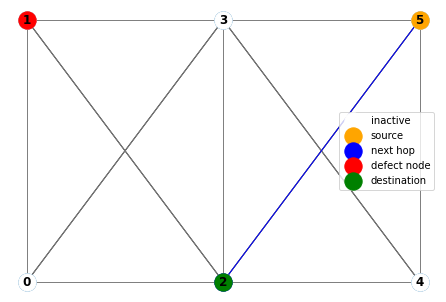

In [8]:
"""Code to test the trained model"""

model = A2C.load("a2c_wmac_small_tuned")

obs = env.reset()
count = 0
while count < 5000:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    count = count + 1
    time.sleep(3)
    clear_output(wait = True)
    if done:
        env.render()
        break
